In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
# Load the dataset
data =pd.read_csv('EV Stats-1.csv')
data.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [36]:
# Shape of the dataframe
data.shape

(30, 10)

In [11]:
# Select only numeric columns for clustering
numerical_cols = data.select_dtypes(include=['int64', 'float64'])
X = data[numeric_cols]
X

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,431,692,4689,0,0,3680,0,9492
1,2,463,138,1006,0,117,151,0,1875
2,3,252,430,2148,6,64,271,0,3171
3,4,613,382,2078,58,106,997,0,4234
4,5,1395,251,5018,0,1,12695,21,19381
5,6,0,0,0,0,0,513,1,514
6,7,7182,217,8476,0,4,15388,0,31267
7,8,3162,1504,13908,113,24,4878,0,23589
8,9,0,0,0,0,0,98,0,98
9,10,2,76,152,0,0,208,0,438


In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Determine optimal number of clusters using the Elbow method
def plot_elbow_method(data):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(10,5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

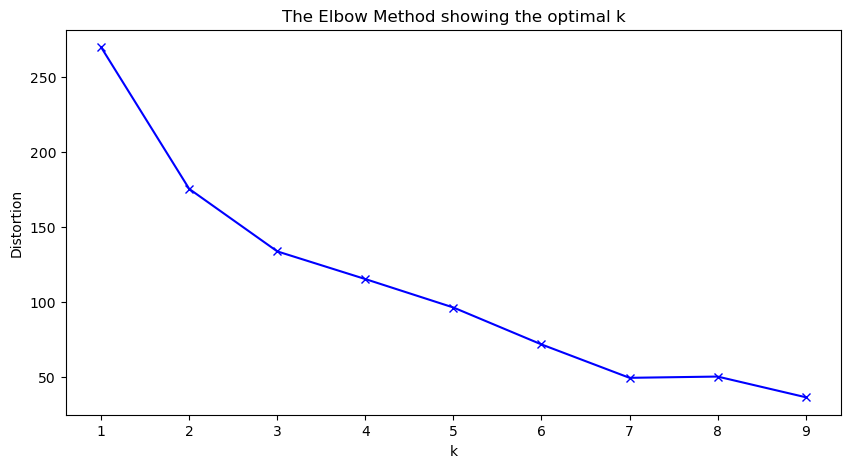

In [16]:
# Now, lets plot X_scaled
plot_elbow_method(X_scaled)

In [17]:
# From the elbow method, determine the optimal number of clusters
optimal_k = 3  

# Update this with the optimal number of clusters you find from the elbow method

In [37]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)
clusters
print('Total no. of clusters:',len(clusters))

Total no. of clusters: 30


In [30]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters
data.sample(5)

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
24,25,Uttar Pradesh,2954,2355,15199,117,139,5445,0,26209,1
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589,1
20,21,Rajasthan,2036,1153,8375,19,64,4116,0,15763,2
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98,0
1,2,Assam,463,138,1006,0,117,151,0,1875,0


In [20]:
# Visualize the clusters using PCA
from sklearn.decomposition import PCA

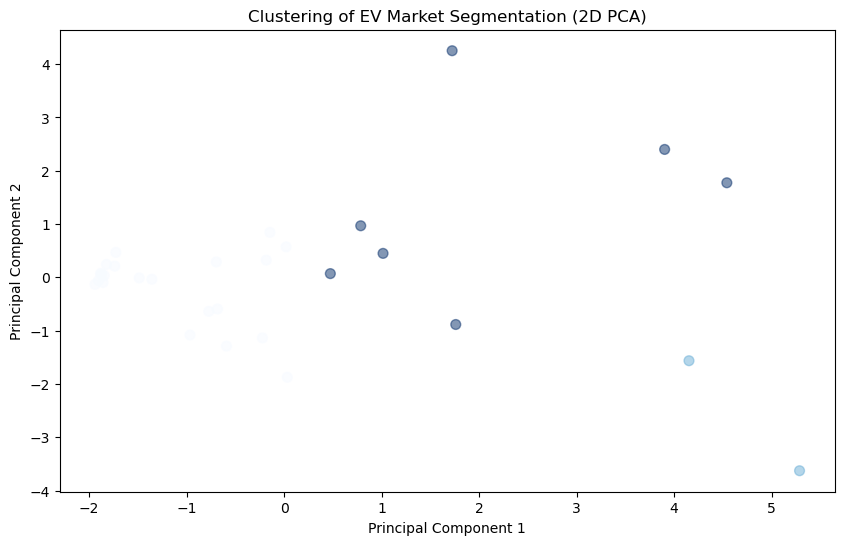

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Blues', s=50, alpha=0.5)
plt.title('Clustering of EV Market Segmentation (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [22]:
# Now, we can analyze the clusters and interpret the results

# Group data by state and calculate total EV usage
statewise_ev_data = data.groupby('State').sum().reset_index()

In [23]:
# Convert all relevant columns to numeric
statewise_ev_data.iloc[:, 1:] = statewise_ev_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0)

In [24]:
# Calculate market share for each category
total_ev_per_state = statewise_ev_data.iloc[:, 1:].sum(axis=1)

for col in statewise_ev_data.columns[1:]:
    statewise_ev_data[col + '_Market_Share'] = statewise_ev_data[col] / total_ev_per_state

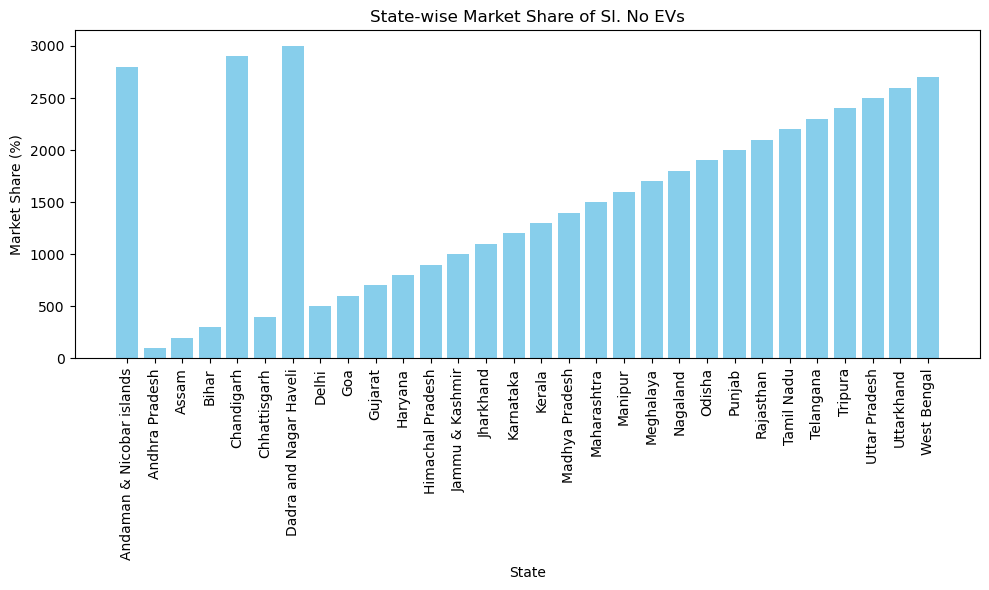

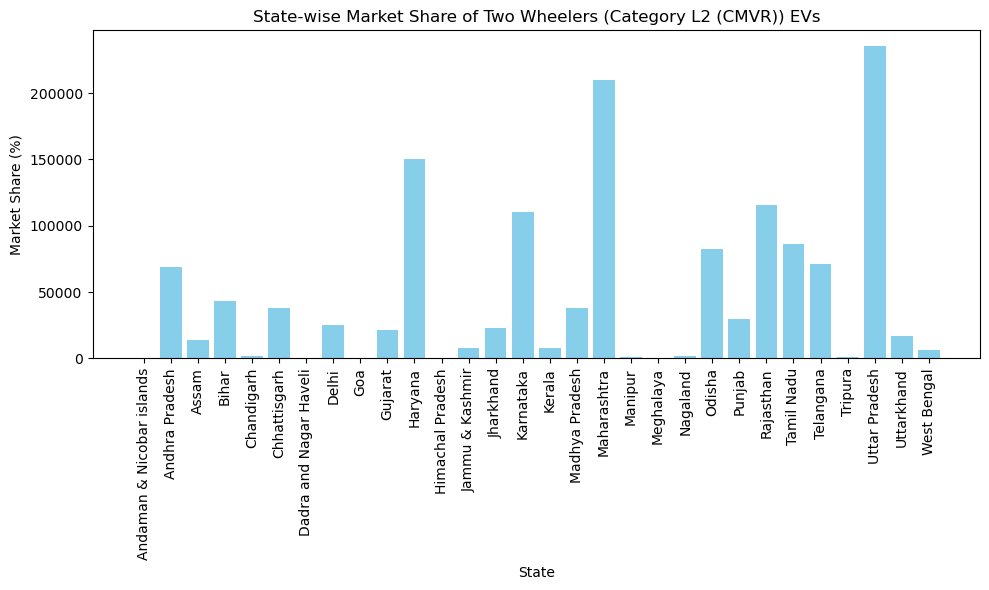

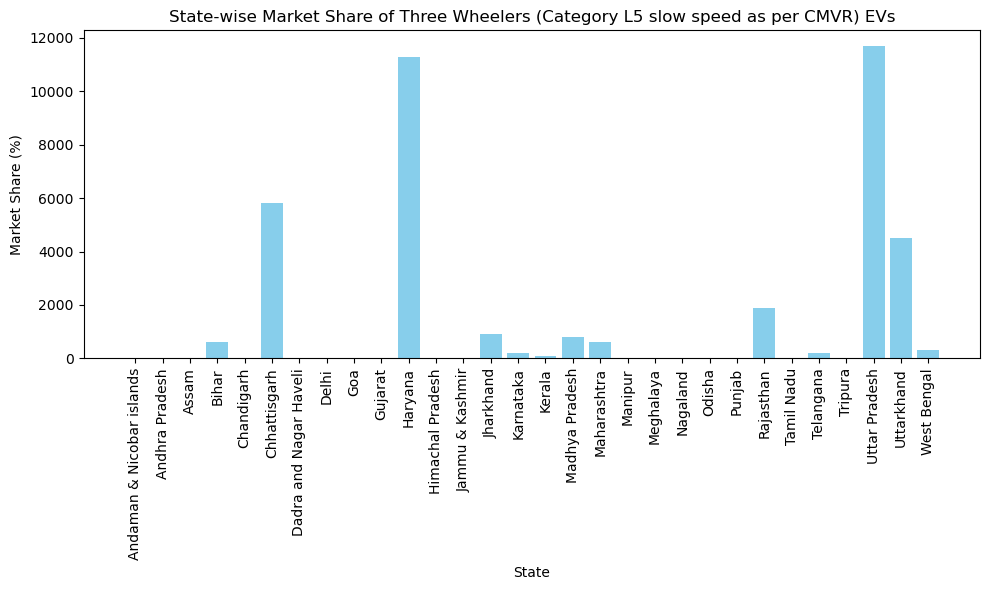

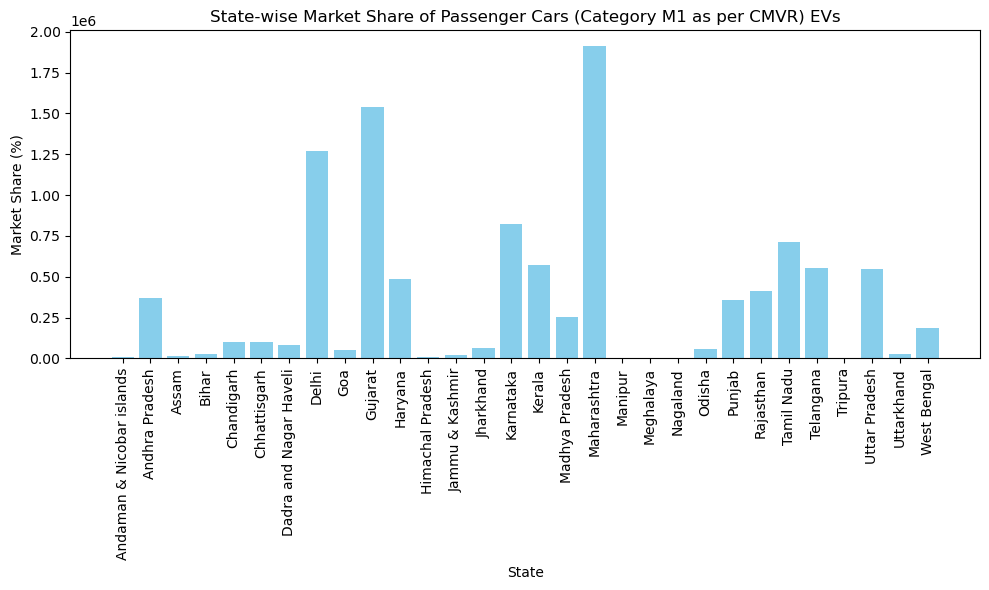

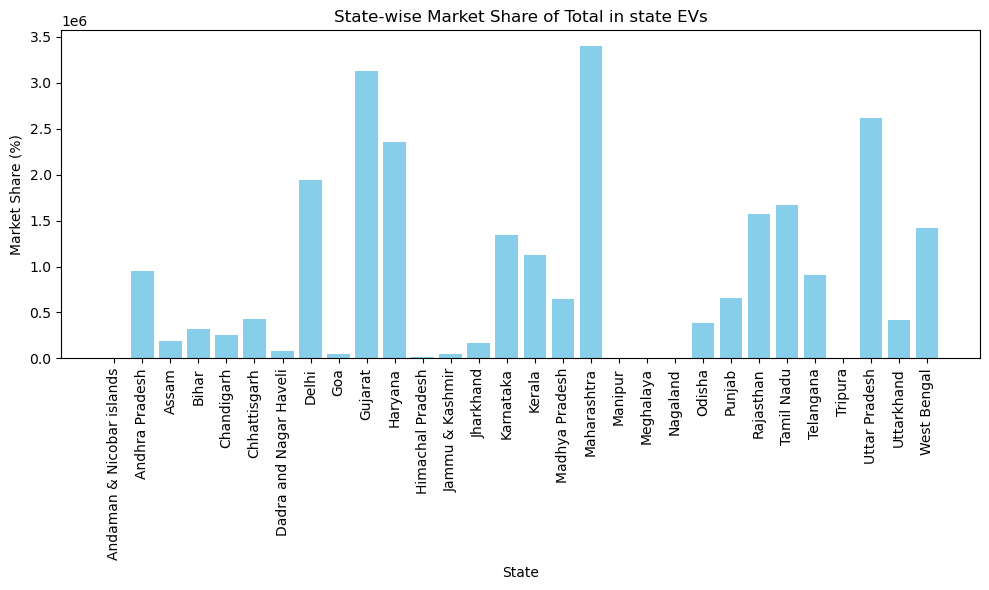

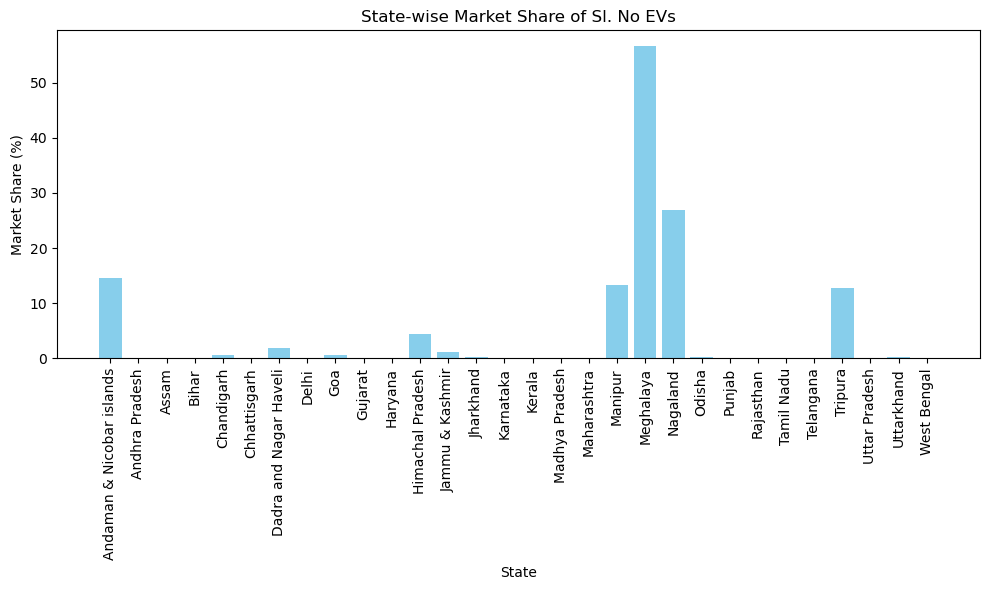

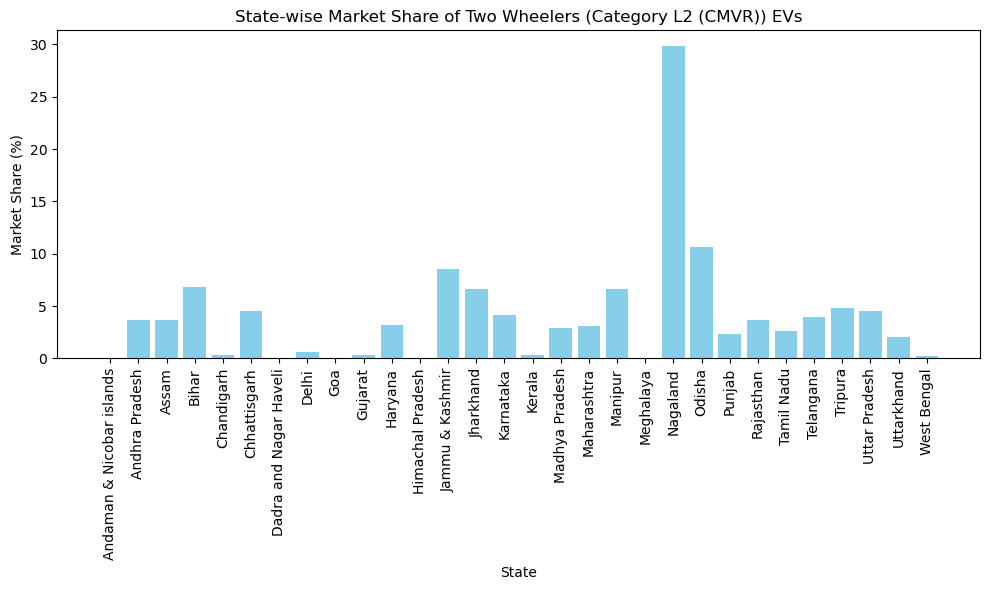

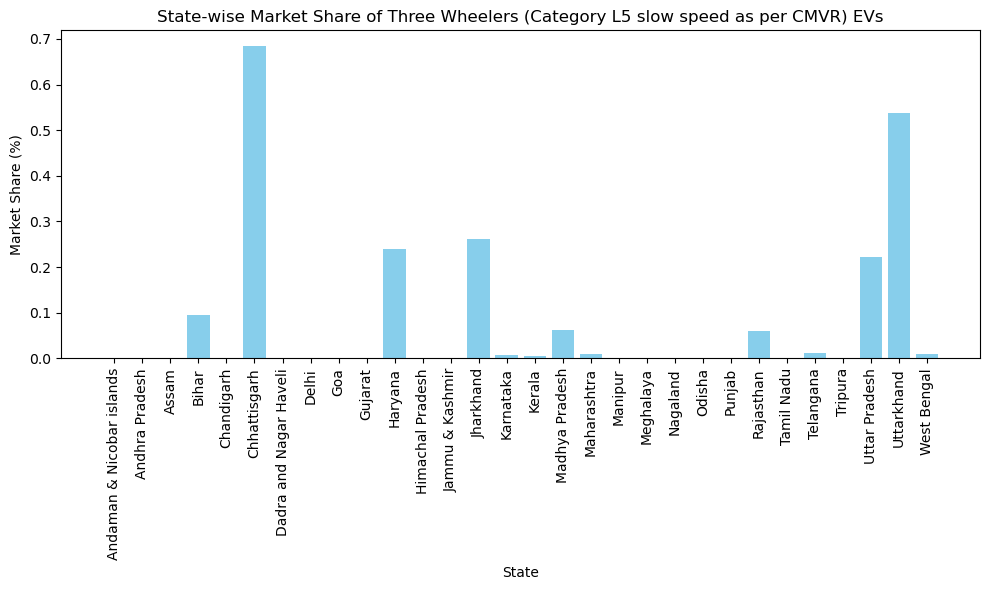

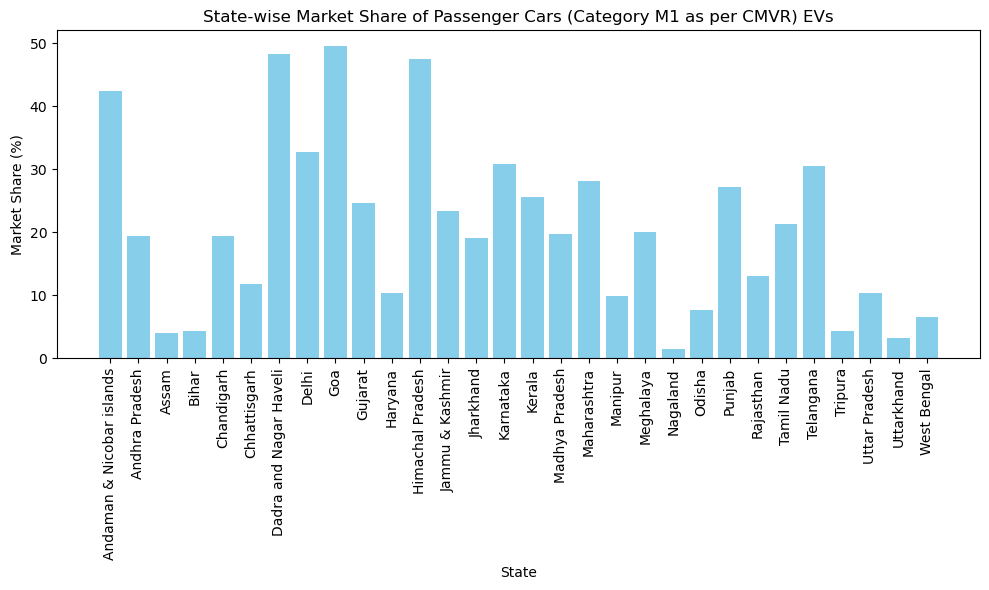

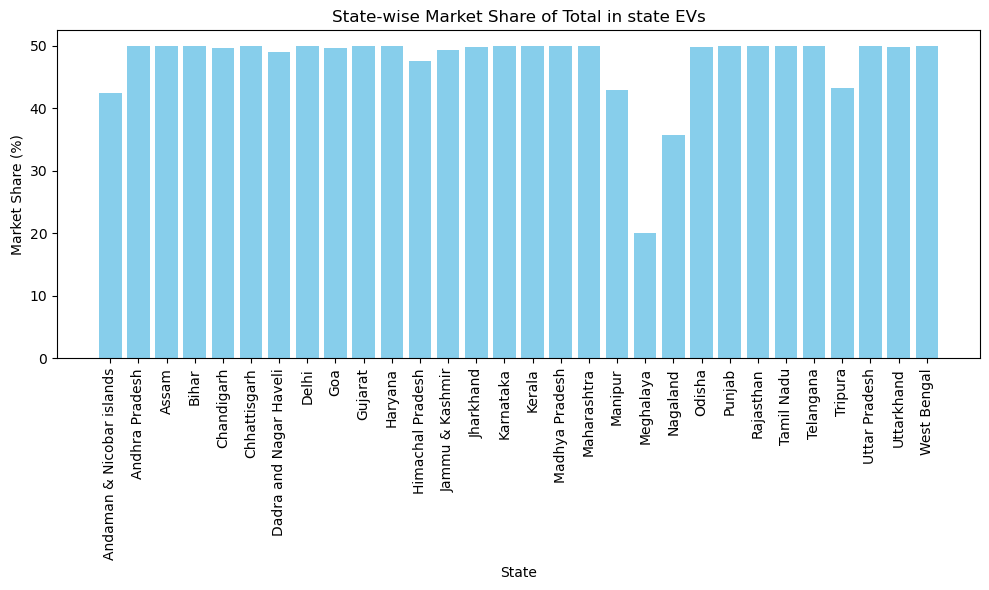

In [25]:
# Plot state-wise market share of each category
for col in statewise_ev_data.columns[1::2]:
    category = col.split('_')[0]
    plt.figure(figsize=(10, 6))
    plt.bar(statewise_ev_data['State'], statewise_ev_data[col] * 100, color='skyblue')
    plt.title('State-wise Market Share of {} EVs'.format(category))
    plt.xlabel('State')
    plt.ylabel('Market Share (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()